<a href="https://colab.research.google.com/github/MarcoMC1616/TelecomX/blob/main/Challenge_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom_x

Un desafío, donde el enfoque está en el proceso de extracción de datos desde la API, limpieza y transformación. Después de esta etapa de procesamiento, se organiza los datos de manera que permitan análisis más profundos y visualizaciones.

La información y banco de datos esta en el github en este [enlace](https://github.com/ingridcristh/challenge2-data-science-LATAM/tree/main)

## Extracción de datos

Extracción de datos de la API de Telecom X

### Importación de las librerías usadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
# url del archivo json
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

### Creación del DataFrame usando la librería pandas

In [3]:
datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Transformación

### Inspeccionando el tipo de datos de cada columna

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Normalizando el json

In [5]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

DataFrame = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
DataFrame

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Inspeccionando el tipo de datos de cada columna

In [6]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Estandarización y transformación de datos

Cambiando los valores de "Yes" y "No" de las colunmas que poseean estas entradas en el dataframe por los valores de 1 y 0 respectivamente para facilitar el procesamiento matemático

#### Columna Churn

In [7]:
DataFrame['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

Como no hay una regla para tratar la excepción del espacio en blanco será tomado como un "No" para efectos de tratamiento de datos

In [8]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Churn
(DataFrame['Churn'] == 'Yes').sum()

np.int64(1869)

In [9]:
# Contanto la cantidad de veces que debería aparecer el valor "No" en la columna Churn
((DataFrame['Churn'] == 'No').sum() + (DataFrame['Churn'] == '').sum())

np.int64(5398)

In [10]:
# Cambiando los valores
DataFrame['Churn'] = DataFrame['Churn'].str.strip().map({'Yes': 1, 'No': 0, '': 0}).astype(int)
DataFrame['Churn']

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [11]:
DataFrame['Churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [12]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['Churn'].unique()

array([0, 1])

Verificando que los cambios sean correctos

In [13]:
# Cantidas de veces que aparece el valor 1
(DataFrame['Churn'] == 1).sum()

np.int64(1869)

In [14]:
# Cantidas de veces que aparece el valor 0
(DataFrame['Churn'] == 0).sum()

np.int64(5398)

#### Columna Partner

In [15]:
DataFrame['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['Partner'] == 'Yes').sum()

np.int64(3518)

In [17]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['Partner'] == 'No').sum()

np.int64(3749)

In [18]:
# Cambiando los valores
DataFrame['Partner'] = DataFrame['Partner'].str.strip().map({'Yes': 1, 'No': 0}).astype(int)
DataFrame['Partner']

,Partner
0,1
1,0
2,0
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,1


In [19]:
DataFrame['Partner'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Partner
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [20]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['Partner'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [21]:
# Cantidas de veces que aparece el valor 1
(DataFrame['Partner'] == 1).sum()

np.int64(3518)

In [22]:
# Cantidas de veces que aparece el valor 0
(DataFrame['Partner'] == 0).sum()

np.int64(3749)

#### Columna Dependents

In [23]:
DataFrame['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['Dependents'] == 'Yes').sum()

np.int64(2181)

In [25]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['Dependents'] == 'No').sum()

np.int64(5086)

In [26]:
# Cambiando los valores
DataFrame['Dependents'] = DataFrame['Dependents'].str.strip().map({'Yes': 1, 'No': 0}).astype(int)
DataFrame['Dependents']

,Dependents
0,1
1,0
2,0
3,0
4,0
...,...
7262,0
7263,0
7264,0
7265,1


In [27]:
DataFrame['Dependents'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Dependents
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [28]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['Dependents'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [29]:
# Cantidas de veces que aparece el valor 1
(DataFrame['Dependents'] == 1).sum()

np.int64(2181)

In [30]:
# Cantidas de veces que aparece el valor 0
(DataFrame['Dependents'] == 0).sum()

np.int64(5086)

#### Columna PhoneService

In [31]:
DataFrame['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['PhoneService'] == 'Yes').sum()

np.int64(6560)

In [33]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['PhoneService'] == 'No').sum()

np.int64(707)

In [34]:
# Cambiando los valores
DataFrame['PhoneService'] = DataFrame['PhoneService'].str.strip().map({'Yes': 1, 'No': 0}).astype(int)
DataFrame['PhoneService']

,PhoneService
0,1
1,1
2,1
3,1
4,1
...,...
7262,1
7263,1
7264,1
7265,1


In [35]:
DataFrame['PhoneService'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: PhoneService
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [36]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['PhoneService'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [37]:
# Cantidas de veces que aparece el valor 1
(DataFrame['PhoneService'] == 1).sum()

np.int64(6560)

In [38]:
# Cantidas de veces que aparece el valor 0
(DataFrame['PhoneService'] == 0).sum()

np.int64(707)

#### Columna MultipleLines

In [39]:
DataFrame['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

Se tomará los que no tienen telefono como un usuario sin el servicio de multiples lineas

In [40]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['MultipleLines'] == 'Yes').sum()

np.int64(3065)

In [41]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['MultipleLines'] == 'No').sum() + (DataFrame['MultipleLines'] == 'No phone service').sum()

np.int64(4202)

In [42]:
# Cambiando los valores
DataFrame['MultipleLines'] = DataFrame['MultipleLines'].str.strip().map({'Yes': 1, 'No': 0, 'No phone service': 0}).astype(int)
DataFrame['MultipleLines']

,MultipleLines
0,0
1,1
2,0
3,0
4,0
...,...
7262,0
7263,1
7264,0
7265,0


In [43]:
DataFrame['MultipleLines'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: MultipleLines
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [44]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['MultipleLines'].unique()

array([0, 1])

Verificando que los cambios sean correctos

In [45]:
# Cantidas de veces que aparece el valor 1
(DataFrame['MultipleLines'] == 1).sum()

np.int64(3065)

In [46]:
# Cantidas de veces que aparece el valor 0
(DataFrame['MultipleLines'] == 0).sum()

np.int64(4202)

#### Columna OnlineSecurity

In [47]:
DataFrame['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Se tomará los que no tienen servicio de internet como un usuario sin el servicio de seguridad en linea


In [48]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['OnlineSecurity'] == 'Yes').sum()

np.int64(2078)

In [49]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['OnlineSecurity'] == 'No').sum() + (DataFrame['OnlineSecurity'] == 'No internet service').sum()

np.int64(5189)

In [50]:
# Cambiando los valores
DataFrame['OnlineSecurity'] = DataFrame['OnlineSecurity'].str.strip().map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
DataFrame['OnlineSecurity']

,OnlineSecurity
0,0
1,0
2,0
3,0
4,0
...,...
7262,1
7263,0
7264,0
7265,1


In [51]:
DataFrame['OnlineSecurity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: OnlineSecurity
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [52]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['OnlineSecurity'].unique()

array([0, 1])

Verificando que los cambios sean correctos

In [53]:
# Cantidas de veces que aparece el valor 1
(DataFrame['OnlineSecurity'] == 1).sum()

np.int64(2078)

In [54]:
# Cantidas de veces que aparece el valor 0
(DataFrame['OnlineSecurity'] == 0).sum()

np.int64(5189)

#### Columna OnlineBackup

In [55]:
DataFrame['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Se tomará los que no tienen servicio de internet como un usuario sin el servicio de respaldo en línea

In [56]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['OnlineBackup'] == 'Yes').sum()

np.int64(2504)

In [57]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['OnlineBackup'] == 'No').sum() + (DataFrame['OnlineBackup'] == 'No internet service').sum()

np.int64(4763)

In [58]:
# Cambiando los valores
DataFrame['OnlineBackup'] = DataFrame['OnlineBackup'].str.strip().map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
DataFrame['OnlineBackup']

,OnlineBackup
0,1
1,0
2,0
3,1
4,0
...,...
7262,0
7263,0
7264,1
7265,0


In [59]:
DataFrame['OnlineBackup'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: OnlineBackup
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [60]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['OnlineBackup'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [61]:
# Cantidas de veces que aparece el valor 1
(DataFrame['OnlineBackup'] == 1).sum()

np.int64(2504)

In [62]:
# Cantidas de veces que aparece el valor 0
(DataFrame['OnlineBackup'] == 0).sum()

np.int64(4763)

#### Columna DeviceProtection

In [63]:
DataFrame['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Se tomará los que no tienen servicio de internet como un usuario sin el servicio de protección de dispositivo

In [64]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['DeviceProtection'] == 'Yes').sum()

np.int64(2491)

In [65]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['DeviceProtection'] == 'No').sum() + (DataFrame['DeviceProtection'] == 'No internet service').sum()

np.int64(4776)

In [66]:
# Cambiando los valores
DataFrame['DeviceProtection'] = DataFrame['DeviceProtection'].str.strip().map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
DataFrame['DeviceProtection']

,DeviceProtection
0,0
1,0
2,1
3,1
4,0
...,...
7262,0
7263,0
7264,0
7265,1


In [67]:
DataFrame['DeviceProtection'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: DeviceProtection
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [68]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['DeviceProtection'].unique()

array([0, 1])

Verificando que los cambios sean correctos

In [69]:
# Cantidas de veces que aparece el valor 1
(DataFrame['DeviceProtection'] == 1).sum()

np.int64(2491)

In [70]:
# Cantidas de veces que aparece el valor 0
(DataFrame['DeviceProtection'] == 0).sum()

np.int64(4776)

#### Columna TechSupport

In [71]:
DataFrame['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Se tomará los que no tienen servicio de internet como un usuario sin el servicio de soporte técnico

In [72]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['TechSupport'] == 'Yes').sum()

np.int64(2104)

In [73]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['TechSupport'] == 'No').sum() + (DataFrame['TechSupport'] == 'No internet service').sum()

np.int64(5163)

In [74]:
# Cambiando los valores
DataFrame['TechSupport'] = DataFrame['TechSupport'].str.strip().map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
DataFrame['TechSupport']

,TechSupport
0,1
1,0
2,0
3,0
4,1
...,...
7262,1
7263,0
7264,0
7265,1


In [75]:
DataFrame['TechSupport'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: TechSupport
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [76]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['TechSupport'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [77]:
# Cantidas de veces que aparece el valor 1
(DataFrame['TechSupport'] == 1).sum()

np.int64(2104)

In [78]:
# Cantidas de veces que aparece el valor 0
(DataFrame['TechSupport'] == 0).sum()

np.int64(5163)

#### Columna StreamingTV

In [79]:
DataFrame['StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Se tomará los que no tienen servicio de internet como un usuario sin el servicio de televisión por cable

In [80]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['StreamingTV'] == 'Yes').sum()

np.int64(2790)

In [81]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['StreamingTV'] == 'No').sum() + (DataFrame['StreamingTV'] == 'No internet service').sum()

np.int64(4477)

In [82]:
# Cambiando los valores
DataFrame['StreamingTV'] = DataFrame['StreamingTV'].str.strip().map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
DataFrame['StreamingTV']

,StreamingTV
0,1
1,0
2,0
3,1
4,1
...,...
7262,0
7263,0
7264,0
7265,0


In [83]:
DataFrame['StreamingTV'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: StreamingTV
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [84]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['StreamingTV'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [85]:
# Cantidas de veces que aparece el valor 1
(DataFrame['StreamingTV'] == 1).sum()

np.int64(2790)

In [86]:
# Cantidas de veces que aparece el valor 0
(DataFrame['StreamingTV'] == 0).sum()

np.int64(4477)

#### Columna StreamingMovies

In [87]:
DataFrame['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Se tomará los que no tienen servicio de internet como un usuario sin el servicio de streaming de películas

In [88]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['StreamingMovies'] == 'Yes').sum()

np.int64(2816)

In [89]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['StreamingMovies'] == 'No').sum() + (DataFrame['StreamingMovies'] == 'No internet service').sum()

np.int64(4451)

In [90]:
# Cambiando los valores
DataFrame['StreamingMovies'] = DataFrame['StreamingMovies'].str.strip().map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)
DataFrame['StreamingMovies']

,StreamingMovies
0,0
1,1
2,0
3,1
4,0
...,...
7262,0
7263,1
7264,0
7265,1


In [91]:
DataFrame['StreamingMovies'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: StreamingMovies
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [92]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['StreamingMovies'].unique()

array([0, 1])

Verificando que los cambios sean correctos

In [93]:
# Cantidas de veces que aparece el valor 1
(DataFrame['StreamingMovies'] == 1).sum()

np.int64(2816)

In [94]:
# Cantidas de veces que aparece el valor 0
(DataFrame['StreamingMovies'] == 0).sum()

np.int64(4451)

#### Columna PaperlessBilling

In [95]:
DataFrame['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [96]:
# Contanto la cantidad de veces que aparece el valor "Yes" en la columna Partner
(DataFrame['PaperlessBilling'] == 'Yes').sum()

np.int64(4311)

In [97]:
# Contanto la cantidad de veces que aparece el valor "No" en la columna Partner
(DataFrame['PaperlessBilling'] == 'No').sum()

np.int64(2956)

In [98]:
# Cambiando los valores
DataFrame['PaperlessBilling'] = DataFrame['PaperlessBilling'].str.strip().map({'Yes': 1, 'No': 0}).astype(int)
DataFrame['PaperlessBilling']

,PaperlessBilling
0,1
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,1
7265,0


In [99]:
DataFrame['PaperlessBilling'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: PaperlessBilling
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [100]:
# Se verfica que los únicos posibles valores de la colmna sean los escogidos
DataFrame['PaperlessBilling'].unique()

array([1, 0])

Verificando que los cambios sean correctos

In [101]:
# Cantidas de veces que aparece el valor 1
(DataFrame['PaperlessBilling'] == 1).sum()

np.int64(4311)

In [102]:
# Cantidas de veces que aparece el valor 0
(DataFrame['PaperlessBilling'] == 0).sum()

np.int64(2956)

#### Columna Charges.Total

La columna Charges.Total no es del tipo correcto

In [103]:
DataFrame['Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

Los valores vacíos para fines de análisis se pasan a considerar como 0

In [104]:
DataFrame['Charges.Total'] = pd.to_numeric(DataFrame['Charges.Total'], errors='coerce').fillna(0)
DataFrame['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


#### Verificación del tipo de datos del dataframe

In [105]:
DataFrame.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [106]:
DataFrame

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [107]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


## Carga y análisis

Análisis descriptivo por medio del cálculo de métricas como la media, mediana, desviación estándar y otras medidas usando la función describe()

In [108]:
DataFrame.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


Gráfico de la variable "churn", para visualizar la proporción de los clientes que permanecen como clientes de la empresa y los que se dieron de baja.

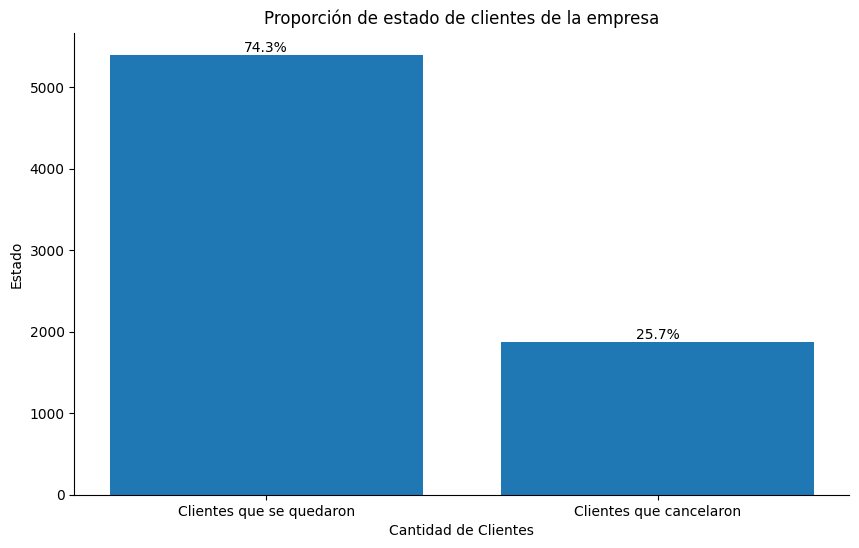

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(DataFrame['Churn'].unique(), DataFrame['Churn'].value_counts())
ax.set_title('Proporción de estado de clientes de la empresa')
ax.set_xlabel('Cantidad de Clientes')
ax.set_ylabel('Estado')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Clientes que se quedaron', 'Clientes que cancelaron'])

for i,j in enumerate(DataFrame['Churn'].value_counts()):
  total = DataFrame.shape[0]
  porcentaje = (j/total)*100
  ax.text(i, j, f'{porcentaje:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Recuento de evasión por algunas variables categóricas

#### Género

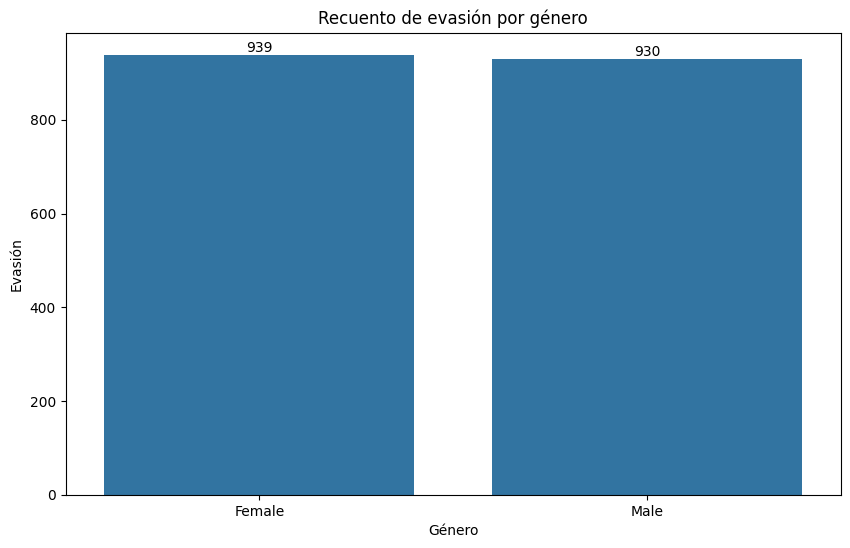

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data=DataFrame, x='gender', y='Churn', estimator='sum', errorbar=None)

plt.title('Recuento de evasión por género')
plt.xlabel('Género')
plt.ylabel('Evasión')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.savefig('Recuento de evasión por género.png', dpi=300)
plt.show()

#### Tipo de Contrato

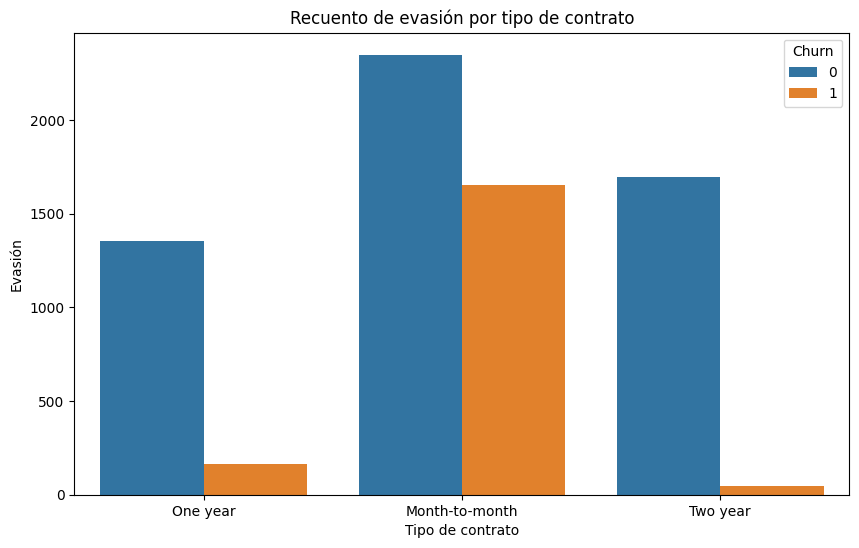

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=DataFrame, x='Contract', hue='Churn')

plt.title('Recuento de evasión por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Evasión')

plt.savefig('Recuento de evasión por tipo de contrato.png', dpi=300)
plt.show()

#### Método de pago

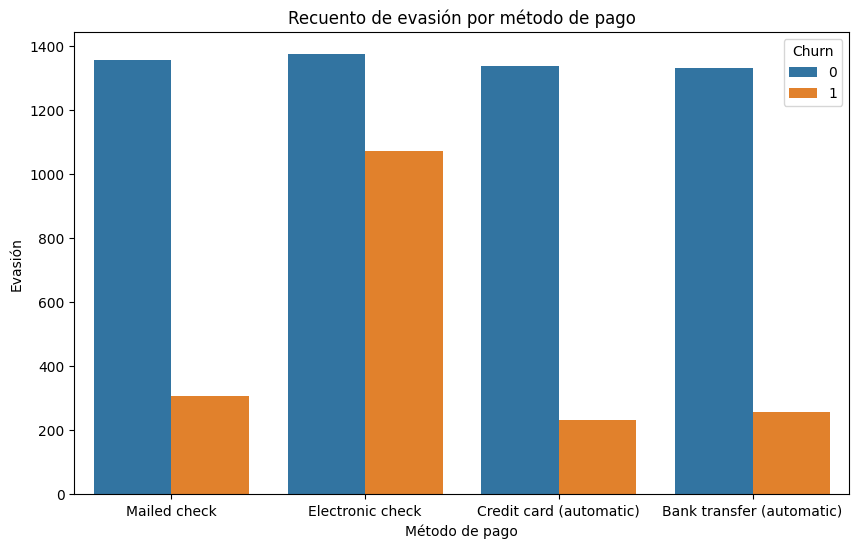

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=DataFrame, x='PaymentMethod', hue='Churn')

plt.title('Recuento de evasión por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Evasión')

plt.savefig('Recuento de evasión por método de pago.png', dpi=300)
plt.show()

### Conteo de evasión por variables numéricas

#### Total gastado

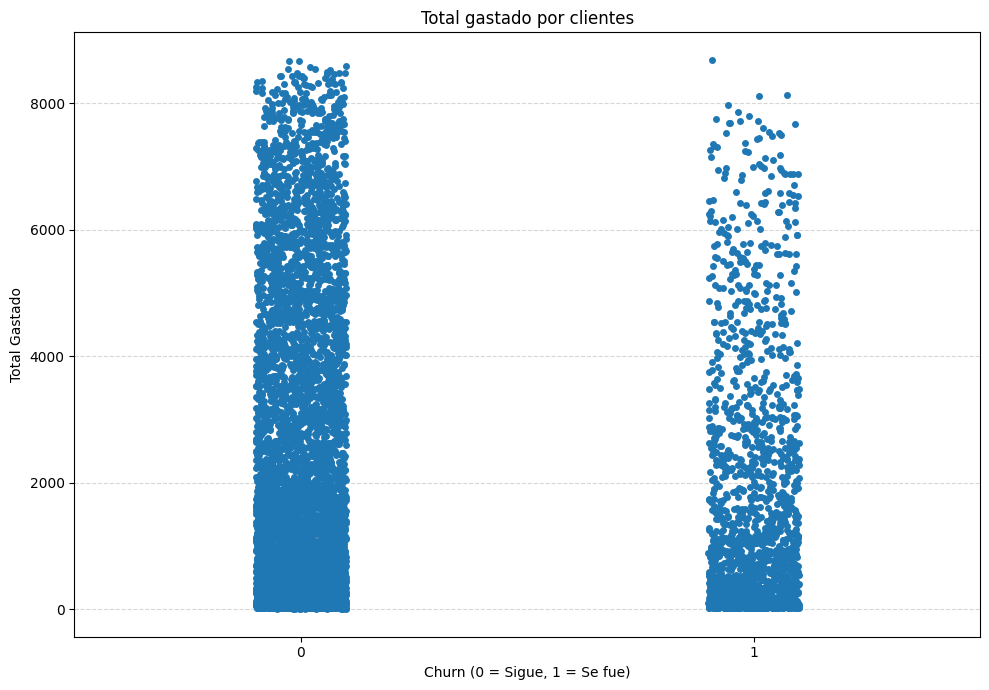

In [113]:
plt.figure(figsize=(10,7))
ax = sns.stripplot(data=DataFrame, x='Churn', y='Charges.Total')

plt.title('Total gastado por clientes')
plt.xlabel('Churn (0 = Sigue, 1 = Se fue)')
plt.ylabel('Total Gastado')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('Total gastado por clientes.png', dpi=300)
plt.show()

#### Tiempo contratado

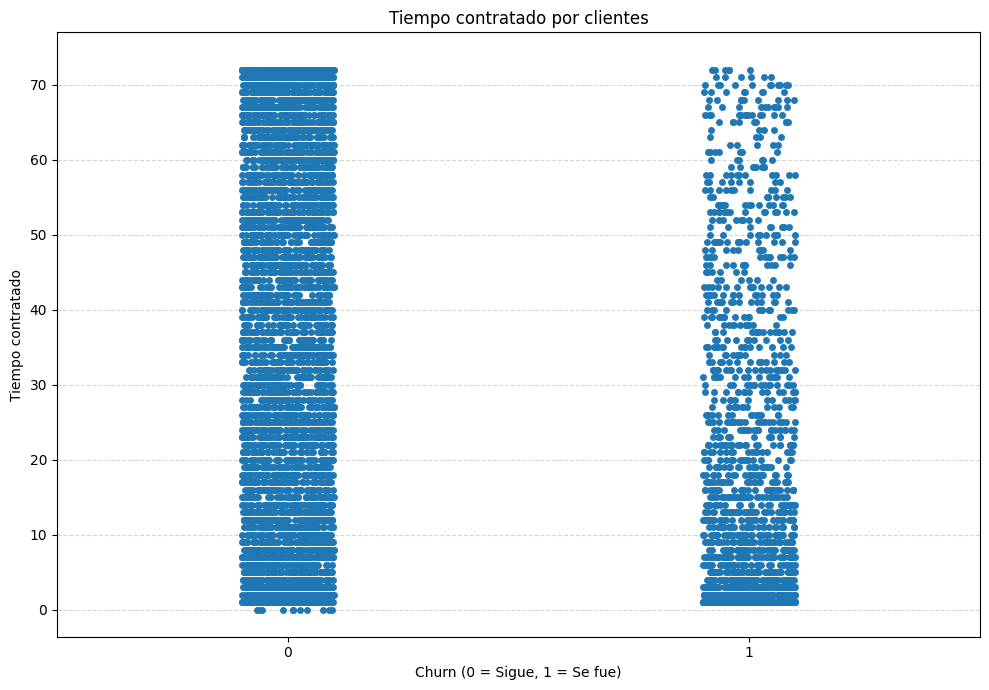

In [114]:
plt.figure(figsize=(10,7))
ax = sns.stripplot(data=DataFrame, x='Churn', y='tenure')

plt.title('Tiempo contratado por clientes')
plt.xlabel('Churn (0 = Sigue, 1 = Se fue)')
plt.ylabel('Tiempo contratado')
plt.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_ylim(top=DataFrame['tenure'].max() + 5)
plt.tight_layout()

plt.savefig('Tiempo_contratado por clientes.png', dpi=300)
plt.show()

## Informe final

Con el propósito de entender los diferentes factores que influyen en la evasión de clientes, se realiza un trabajo de tratamiento y análisis de datos, justo al análisis respecto a una variable particular se adjunta una gráfica que evidencia los comportamientos explicados.

Algunos de los valores importados no tenían correctamente asignado su tipo de variable, por lo que fue necesario ajustar sus formatos. Además, para facilitar los cálculos matemáticos y la interpretación de ciertos modelos, se transformaron variables categóricas como "Yes" y "No" a valores numéricos, asignándoles 1 y 0 respectivamente.

Posteriormente, se llevó a cabo un análisis de la distribución de los datos con el fin de comprender el comportamiento de la evasión en función de distintas variables, tanto categóricas como numéricas.

Los resultados del análisis indican que el género de los clientes no representa un factor relevante en la decisión de abandonar el servicio.

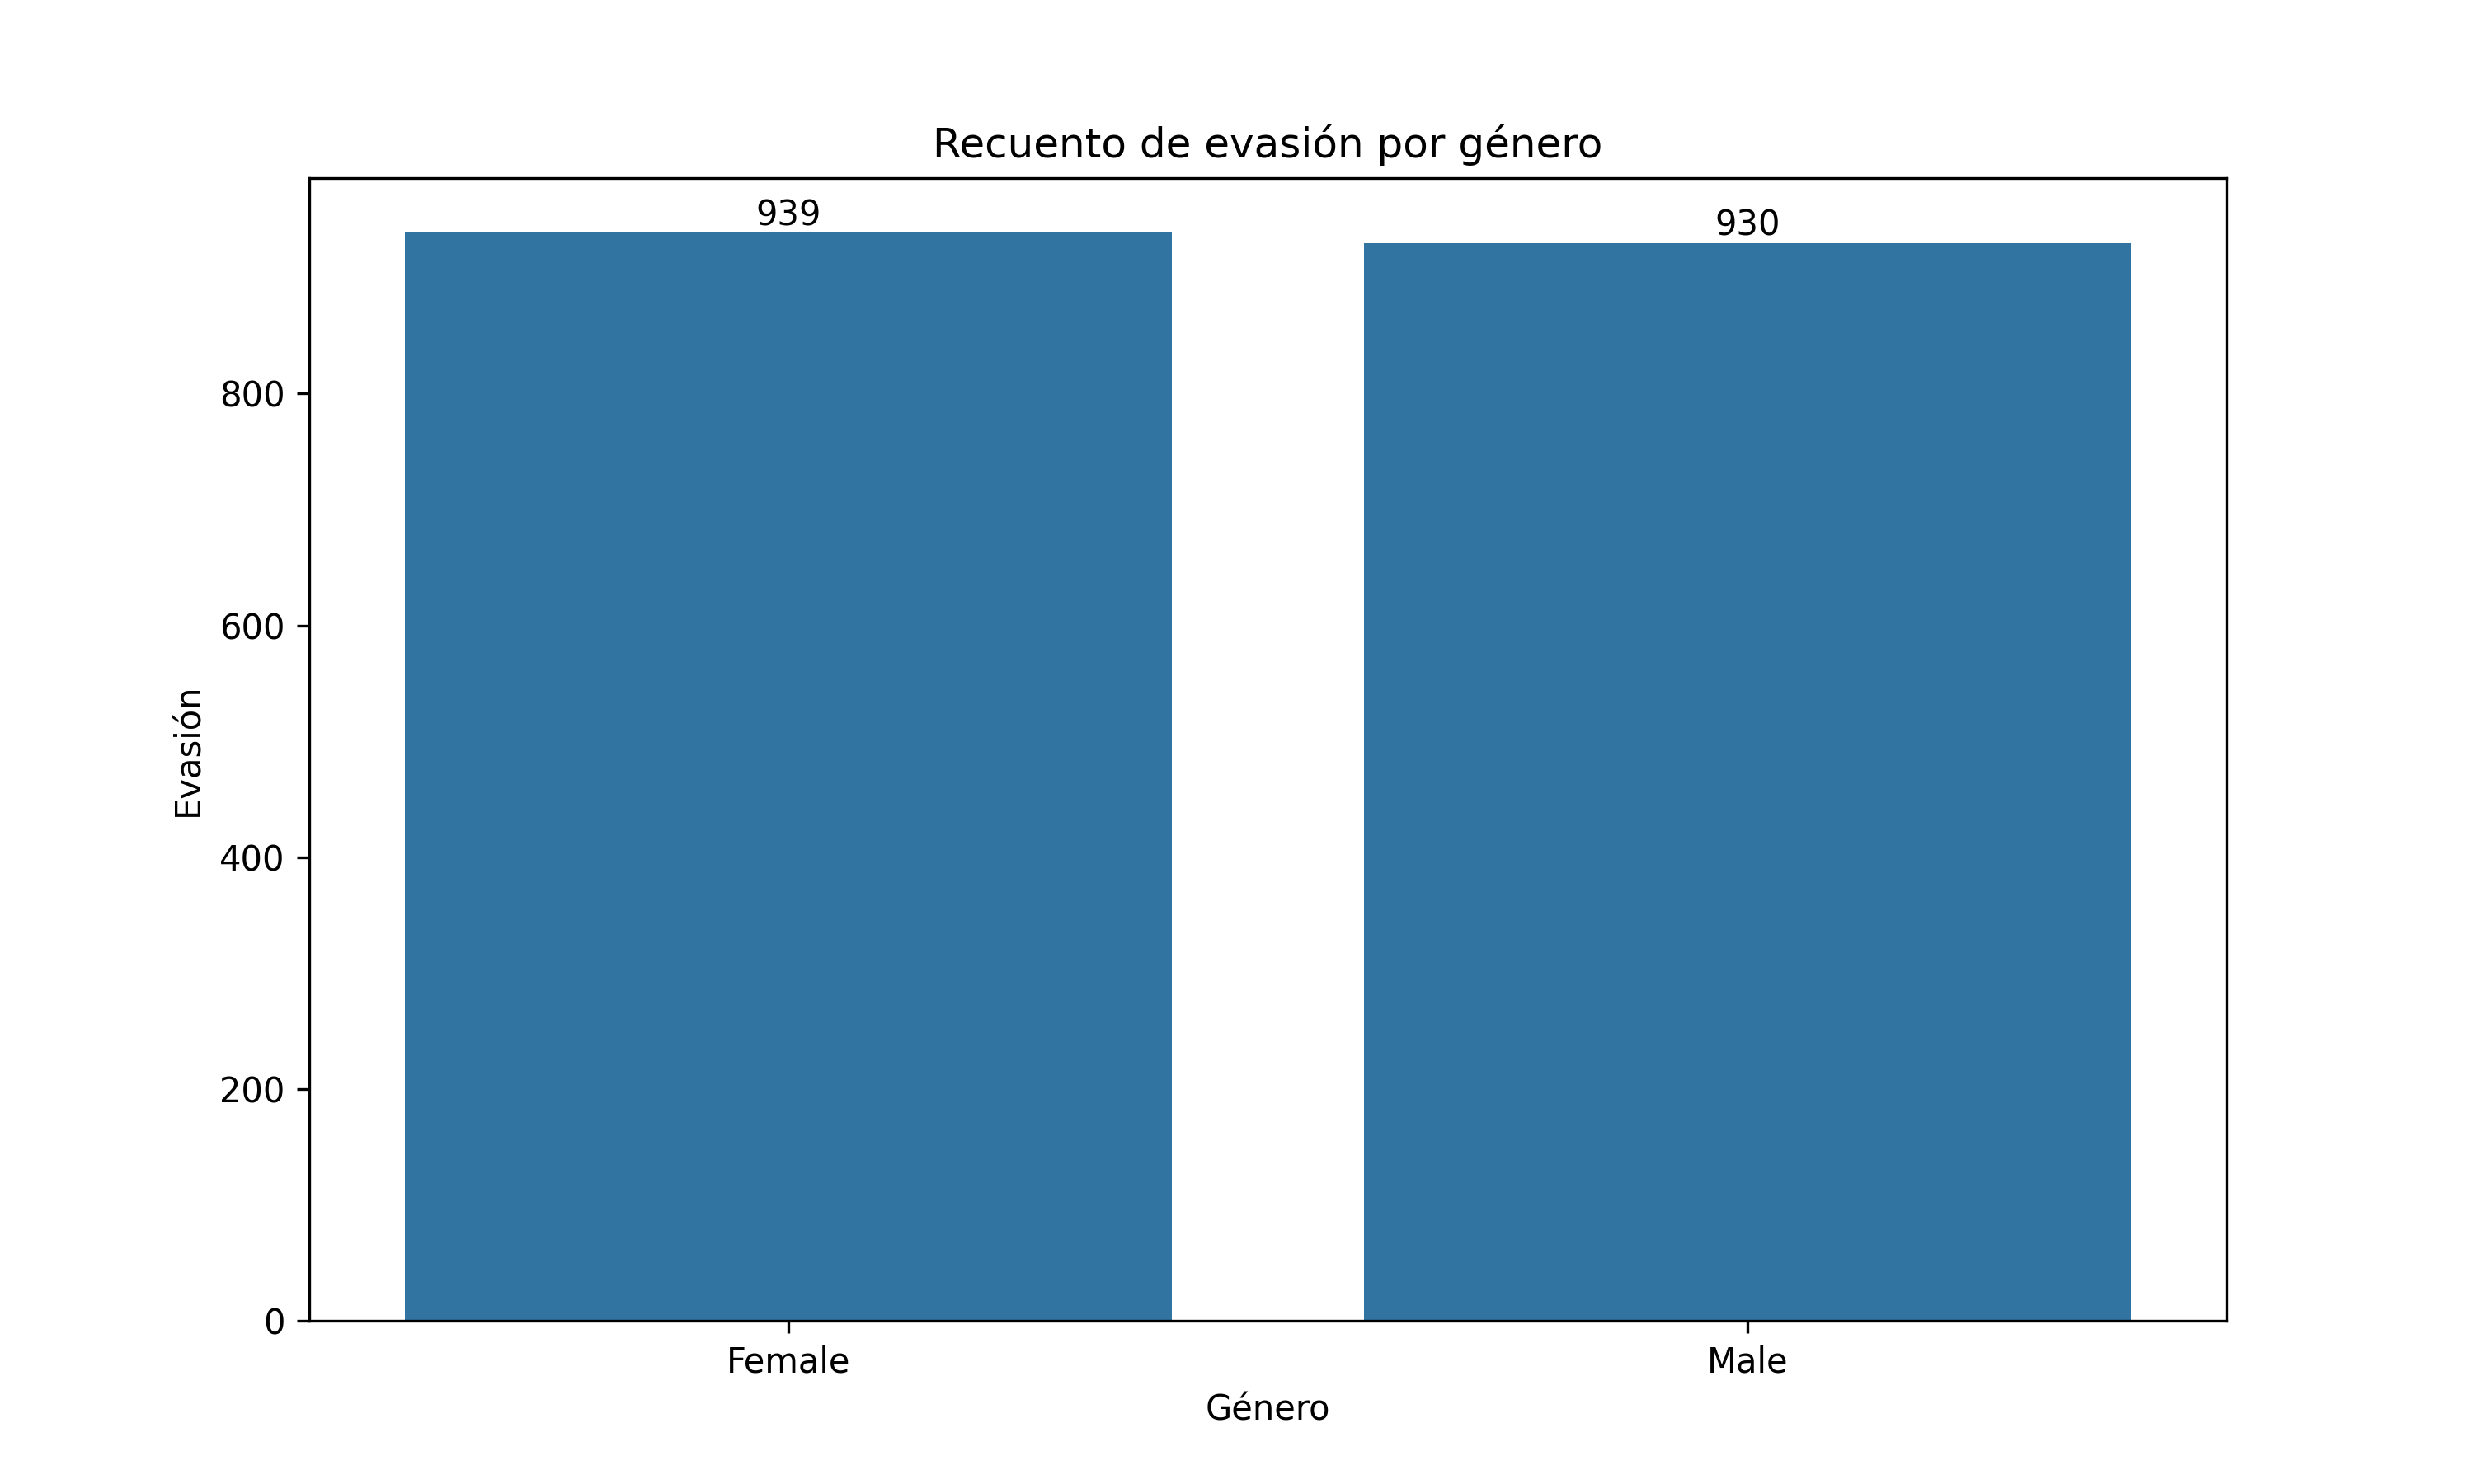

In [115]:
Image('Recuento de evasión por género.png')

En cambio, el tipo de contrato sí muestra una relación significativa, los contratos mensuales de presentan una tasa de evasión más baja en comparación con los contratos de uno o dos años.

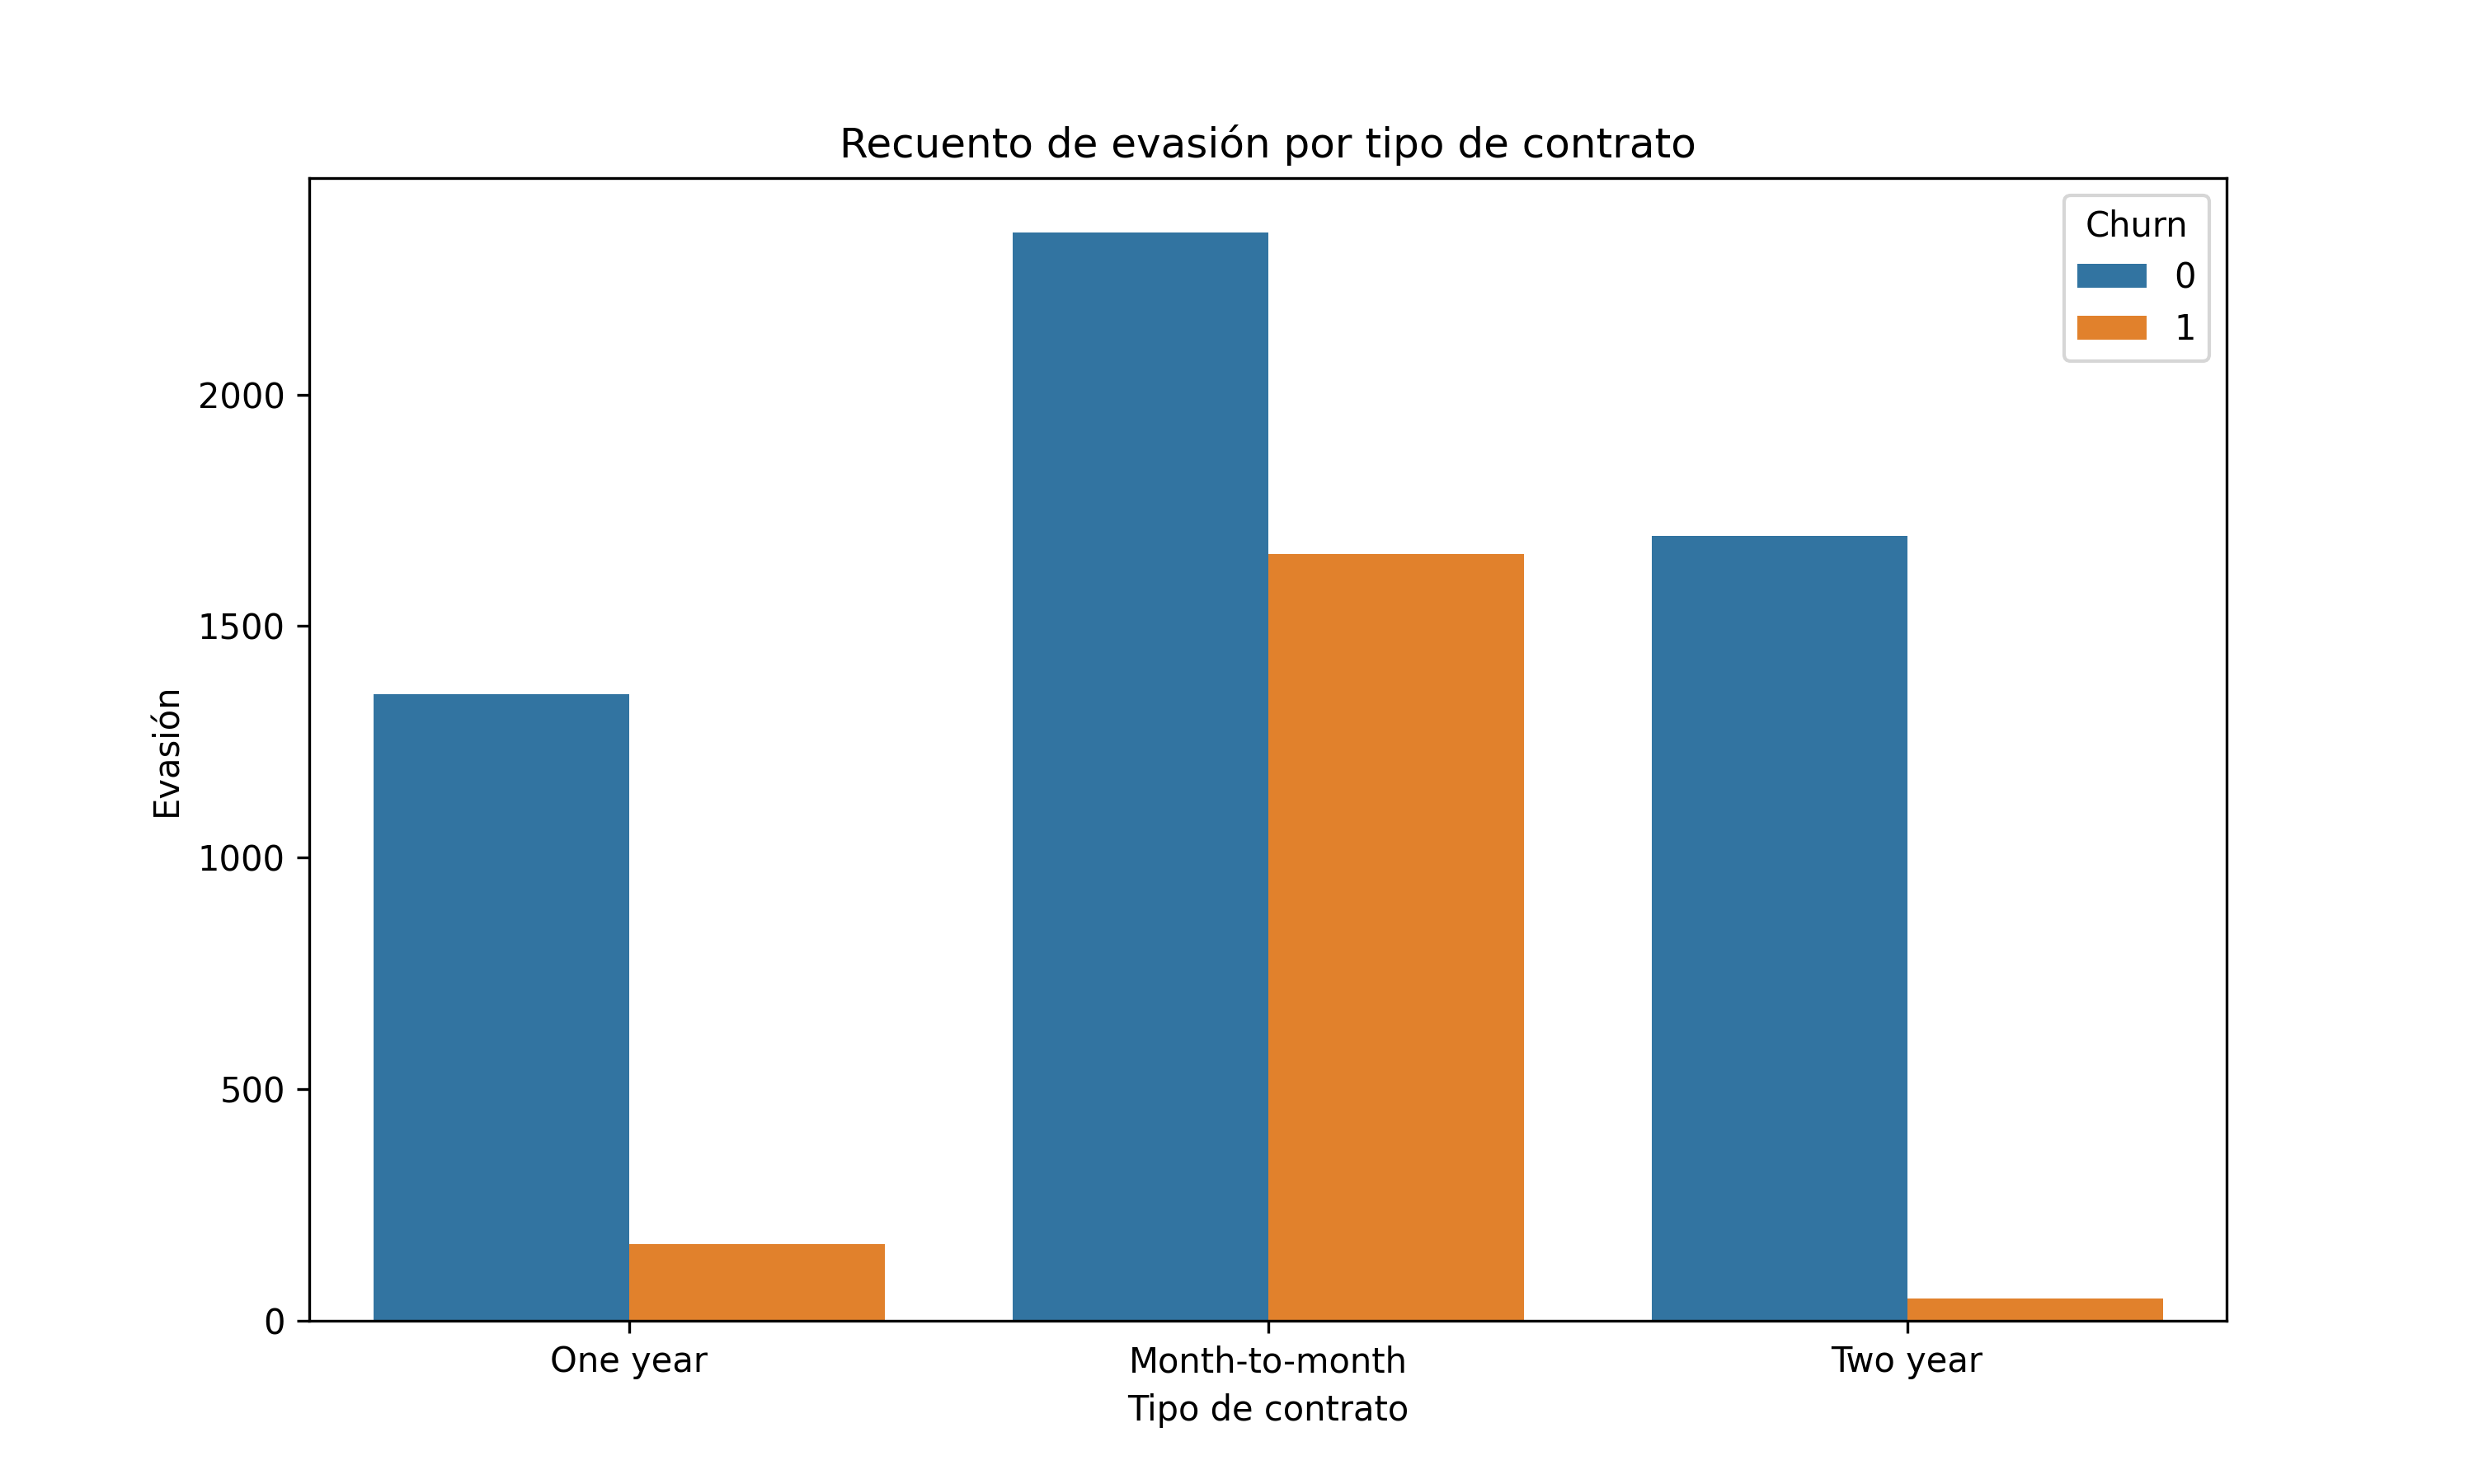

In [116]:
Image('Recuento de evasión por tipo de contrato.png')

Asimismo, el método de pago también parece tener un nivel de impacto, el cheque electrónico es el método más asociado a la evasión de clientes, superando significativamente a otras opciones como la transferencia bancaria o el pago automático con tarjeta de crédito.

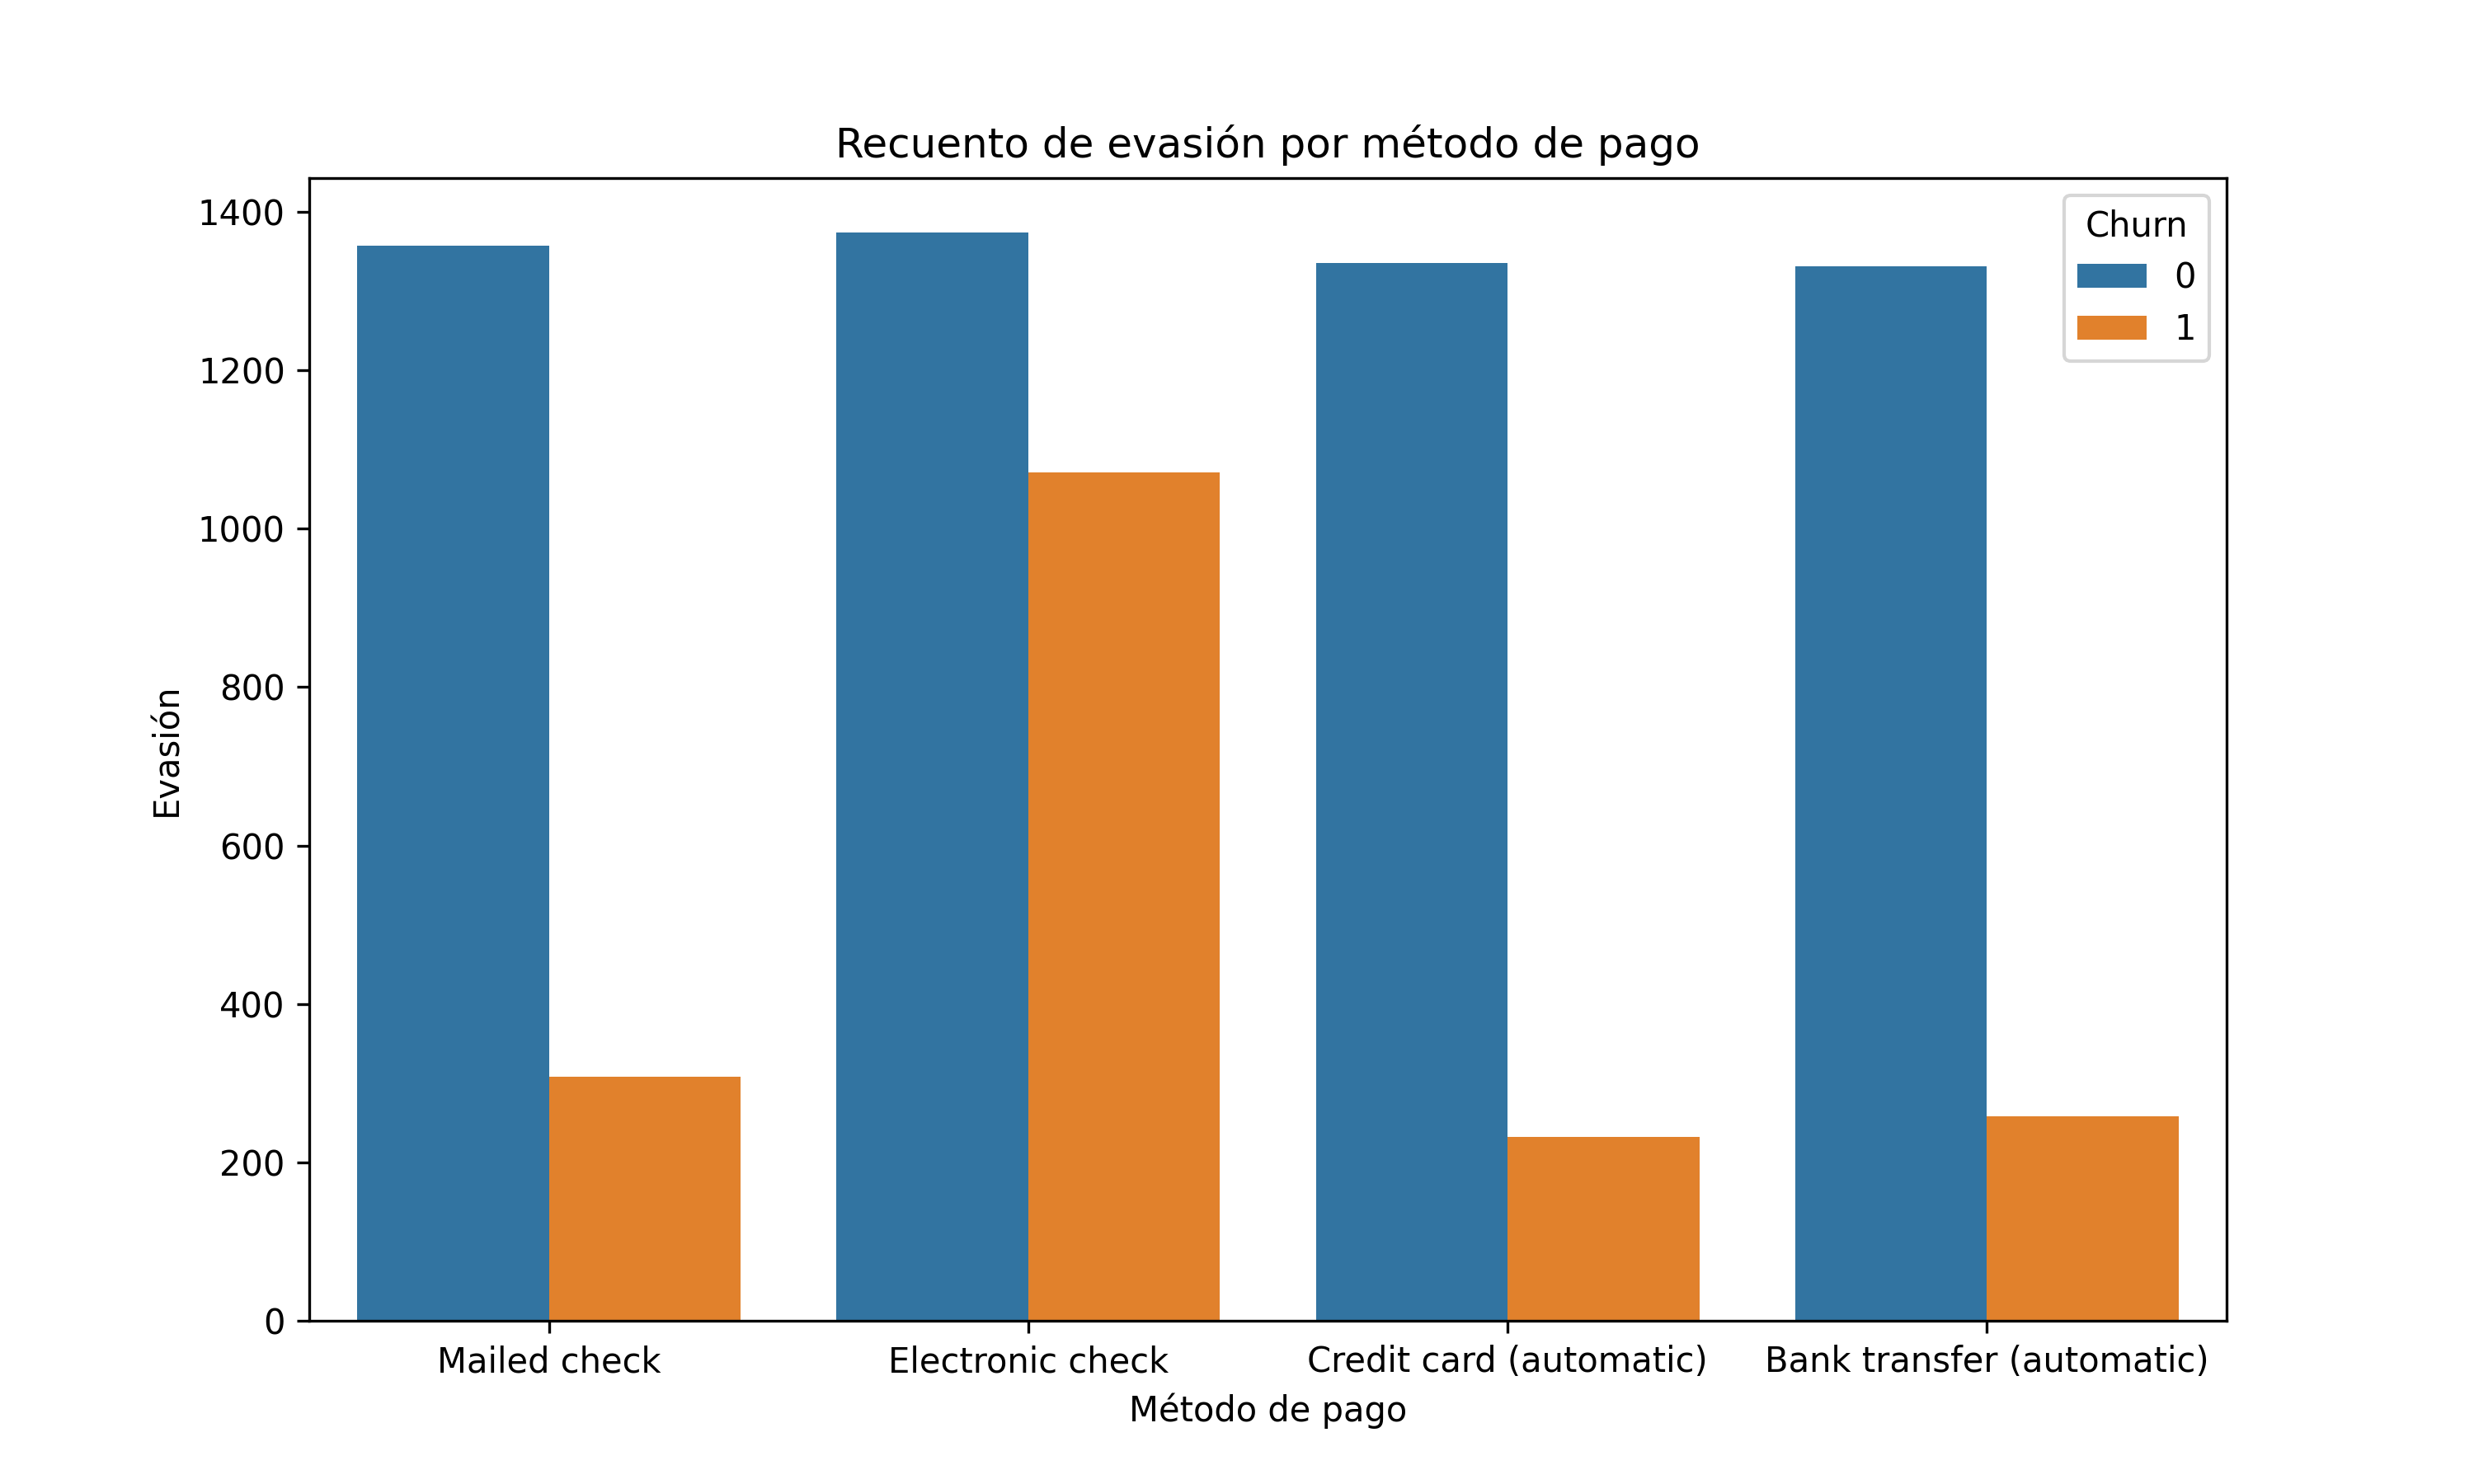

In [117]:
Image('Recuento de evasión por método de pago.png')

Los clientes que presentan un gasto menor evidencian una mayor evasión con respecto a los que registran menos gastos.

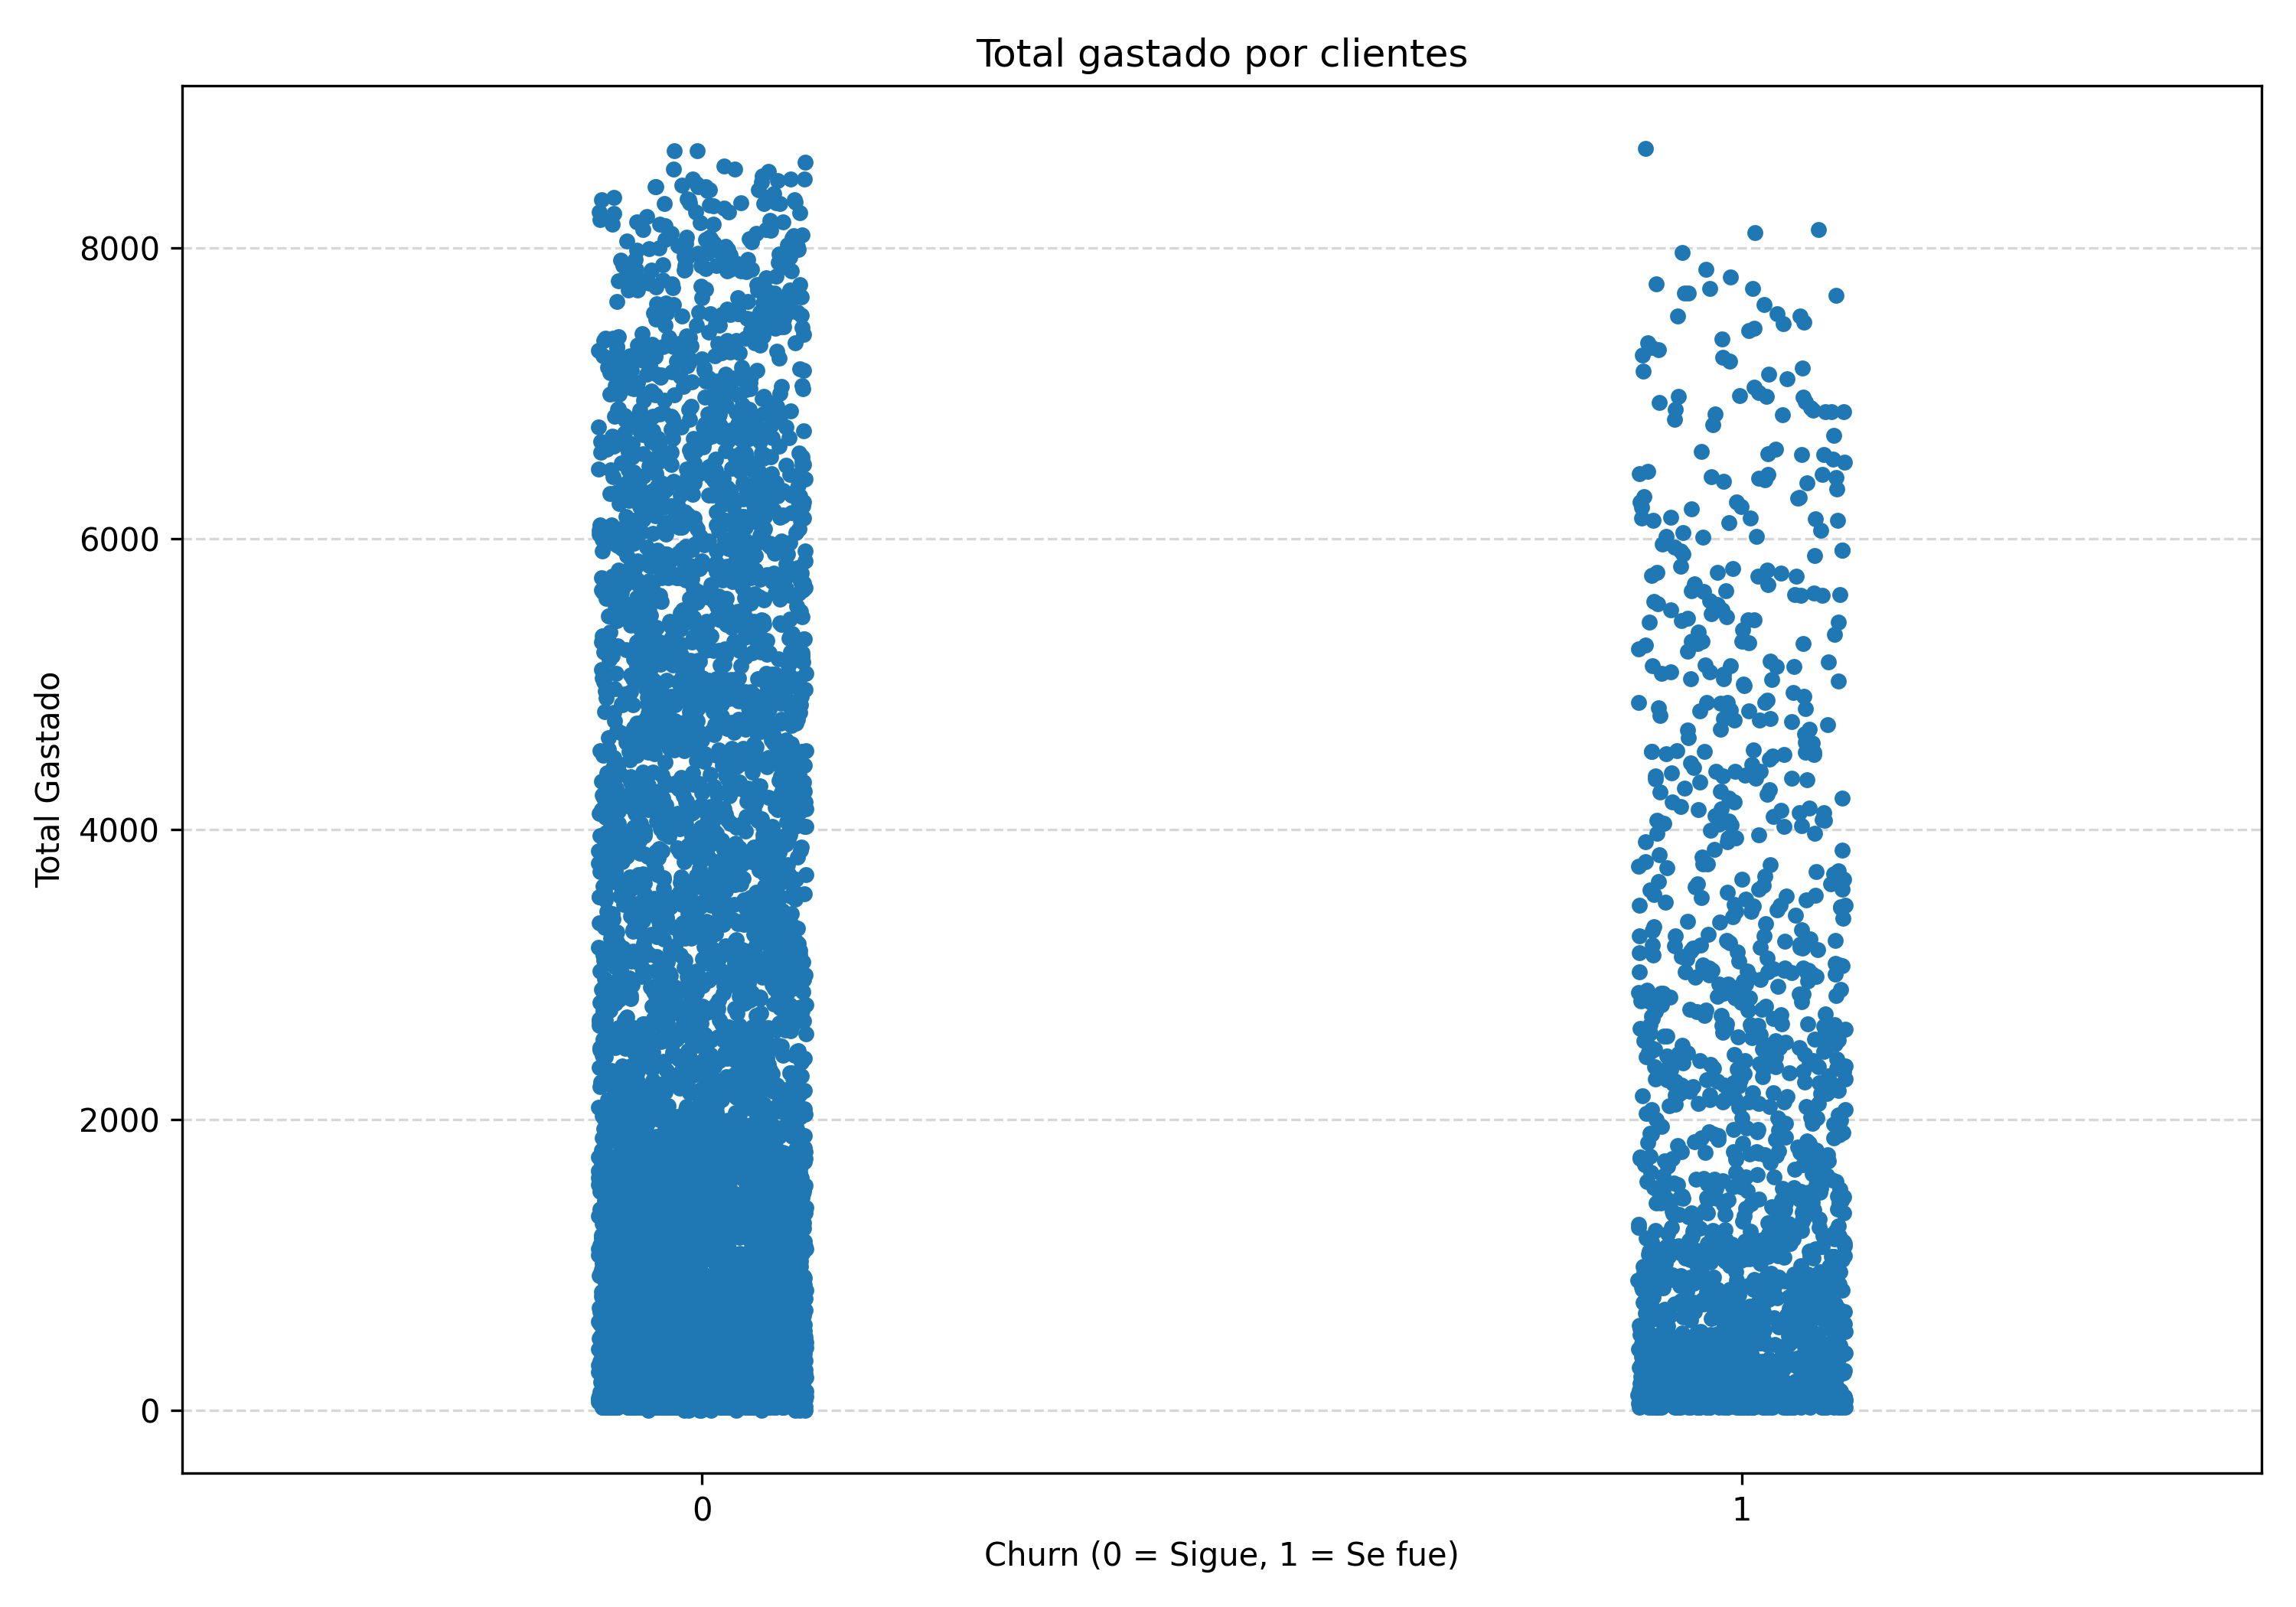

In [118]:
Image('Total gastado por clientes.png')

Los clientes con menos meses de contrato con la empresa presentan un nivel de evasión mas alto con respecto a los que poseen menos meses de contrato.

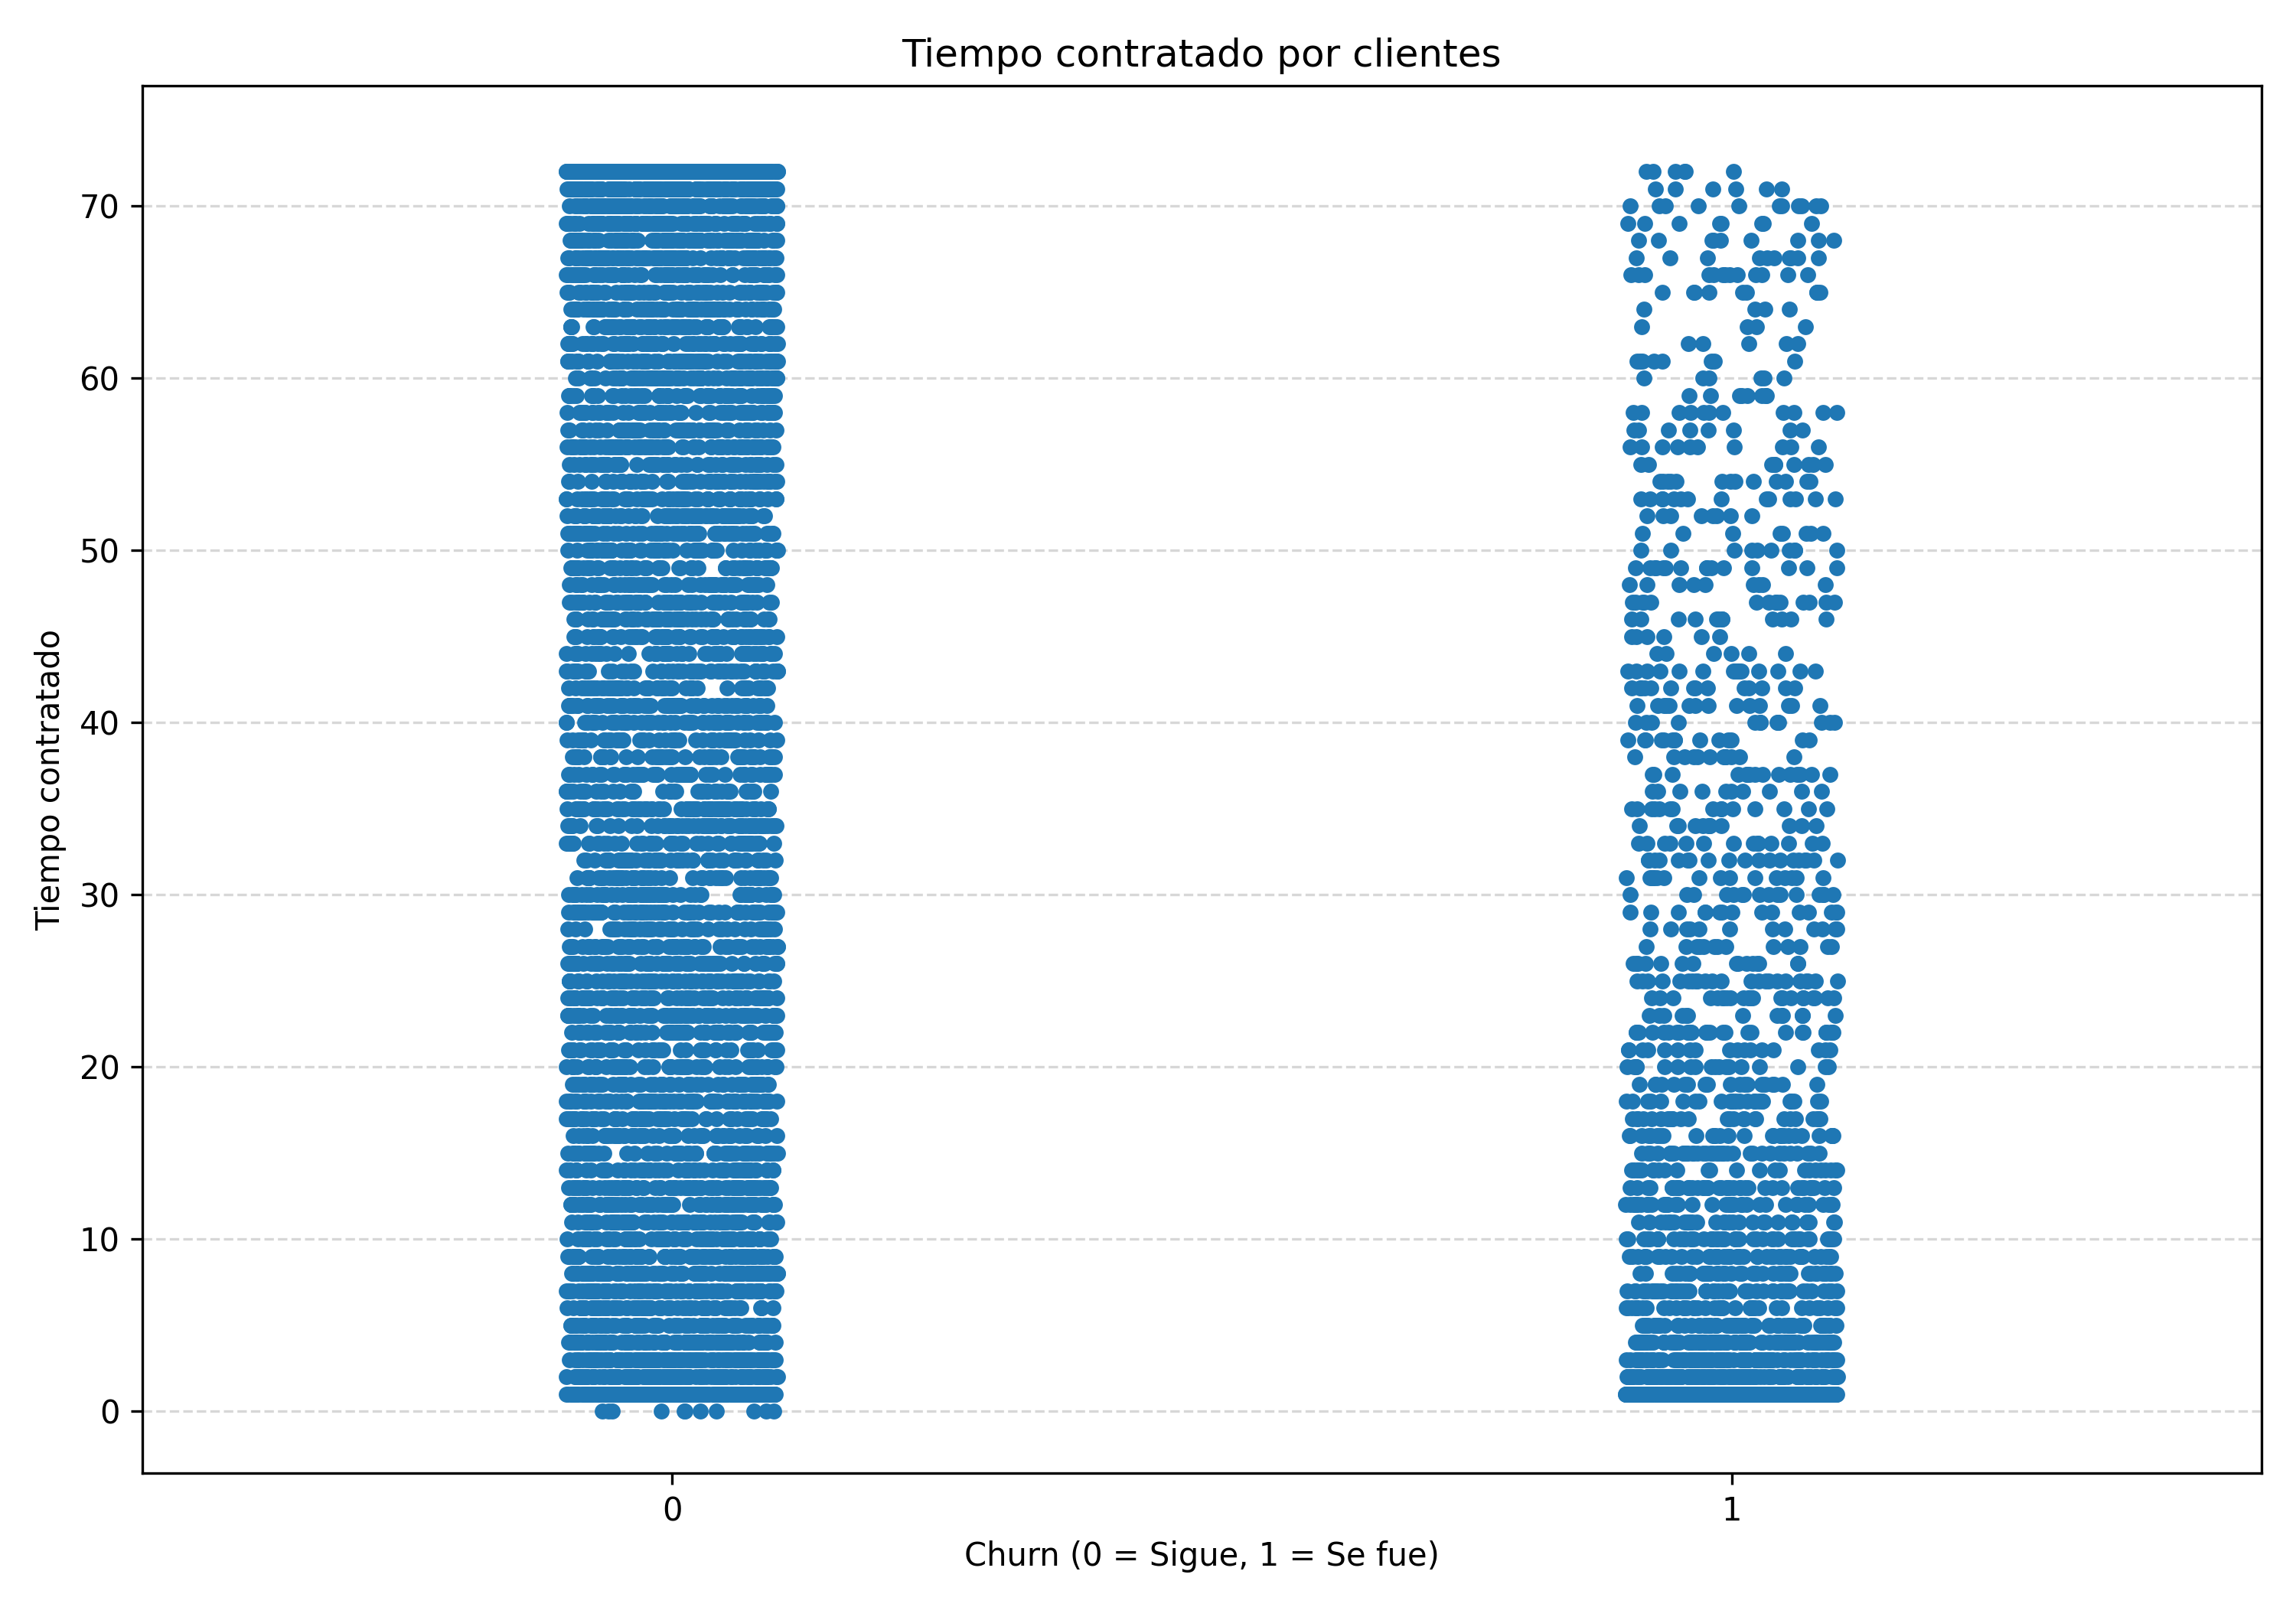

In [119]:
Image('Tiempo_contratado por clientes.png')

#### Recomendaciones

* Incentivar la contratación de planes a largo plazo (anuales o bianuales), ofreciendo descuentos o beneficios adicionales.


* Fomentar métodos de pago más estables y menos asociados a la evasión, como el pago automático con tarjeta.

* Implementar campañas personalizadas de retención enfocadas en clientes con contratos mensuales o que usan cheque electrónico.

* Analizar más a fondo otras variables que podrían estar correlacionadas con la evasión, como la cantidad de servicios contratados o el historial de interacción con atención al cliente.